## 1. 实现计算 Hénon 映射的函数

In [23]:
def henon_map(a, b, u0, N):
    """
    计算 Hénon 映射的轨迹
    参数:
    a, b - Hénon 映射的系数
    u0 - 初始值 (x0, y0)
    N - 轨迹长度
    
    返回:
    轨迹列表 [u0, u1, u2, ..., uN]
    """
    x, y = u0
    trajectory = [(x, y)]
    for _ in range(N):
        x_new = 1 - a * x**2 + y
        y_new = b * x
        trajectory.append((x_new, y_new))
        x, y = x_new, y_new
    return trajectory

# 测试任务1，示例参数
a = 1.4
b = 0.3
u0 = (0, 0)
N = 100
trajectory = henon_map(a, b, u0, N)
print("Hénon 映射的轨迹:", trajectory)


Hénon 映射的轨迹: [(0, 0), (1.0, 0.0), (-0.3999999999999999, 0.3), (1.076, -0.11999999999999997), (-0.7408864000000001, 0.32280000000000003), (0.554322279213056, -0.22226592), (0.3475516150752599, 0.1662966837639168), (0.9971877085659265, 0.10426548452257796), (-0.2878711720383706, 0.2991563125697779), (1.1831385762027349, -0.08636135161151118), (-1.0461049983101596, 0.35494157286082045), (-0.17712836162447815, -0.31383149949304784), (0.6422442614184716, -0.053138508487343444), (0.36939272365771536, 0.19267327842554147), (1.0016419004177701, 0.1108178170973146), (-0.2937832782442163, 0.30049257012533104), (1.179660509719045, -0.08813498347326489), (-1.0363734689401003, 0.35389815291571347), (-0.14979980105639834, -0.3109120406820301), (0.6576719867628187, -0.0449399403169195), (0.34951464064150617, 0.1973015960288456), (1.02627691839698, 0.10485439219245185), (-0.3696876463357104, 0.307883075519094), (1.1165465373245618, -0.11090629390071312), (-0.8562529319167697, 0.33496396119736854), (0.

## 2.绘制经典 Hénon 映射的轨迹图

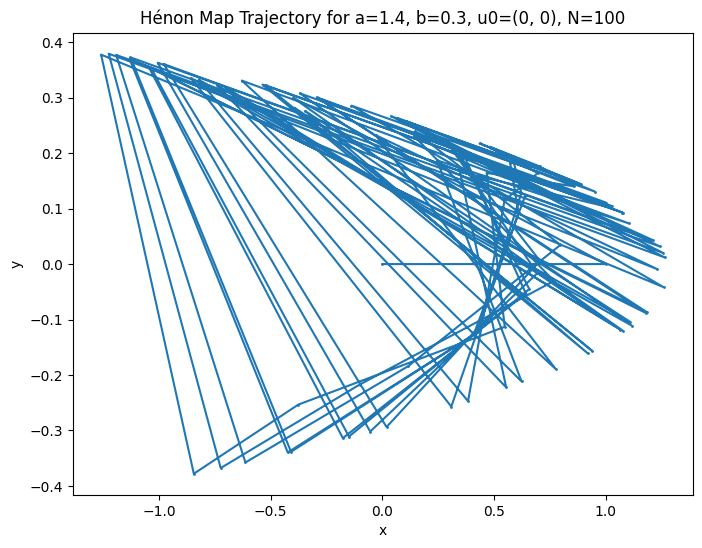

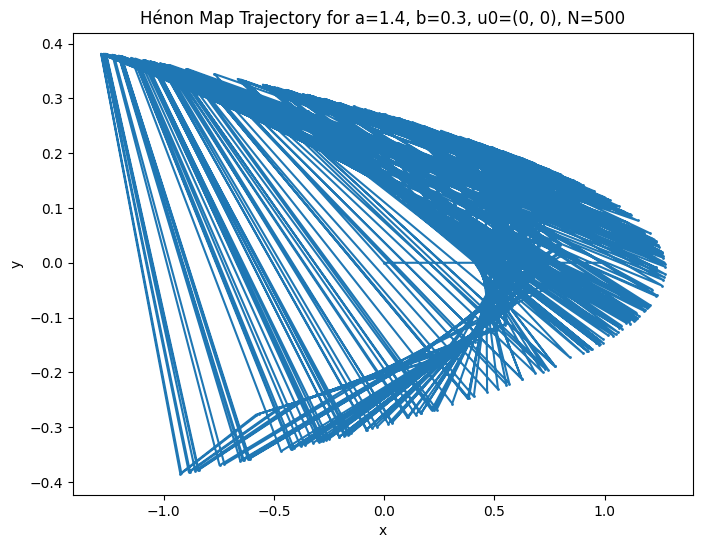

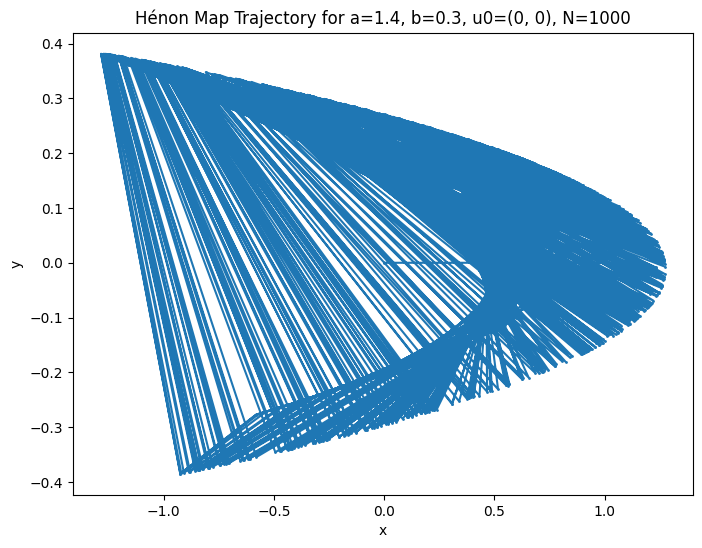

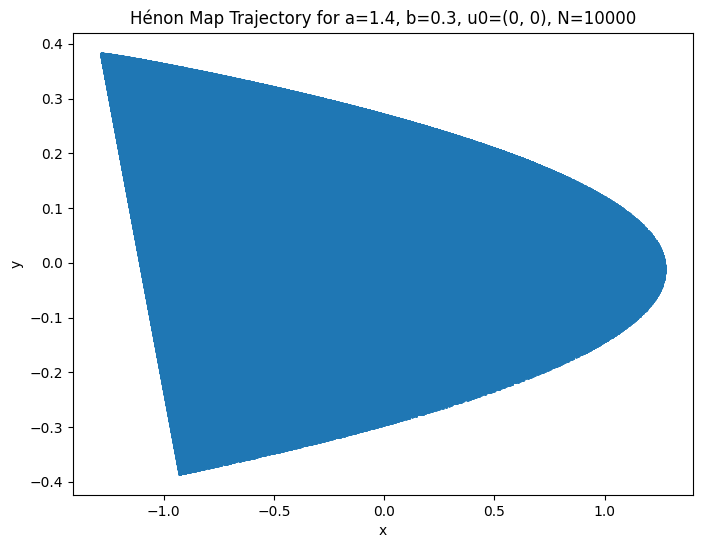

In [24]:
import matplotlib.pyplot as plt

def explore_and_plot_individual_trajectories(a, b, u0, N_values):
    """
    探索不同 N 值下的 Hénon 映射轨迹，每个轨迹绘制在单独的图中
    参数:
    a, b - Hénon 映射的系数
    u0 - 初始值 (x0, y0)
    N_values - 轨迹长度的列表，例如 [100, 500, 1000]
    """
    # 遍历不同的 N 值
    for N in N_values:
        trajectory = henon_map(a, b, u0, N)
        x_vals, y_vals = zip(*trajectory)
        
        # 创建新的图形窗口绘制当前 N 值下的轨迹
        plt.figure(figsize=(8, 6))
        plt.plot(x_vals, y_vals, marker='o', linestyle='-', markersize=1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Hénon Map Trajectory for a={a}, b={b}, u0={u0}, N={N}')
        plt.show()

# 测试任务 2 的扩展，探索不同 N 值并分别绘图
explore_and_plot_individual_trajectories(a=1.4, b=0.3, u0=(0, 0), N_values=[100, 500, 1000,10000])


## 3.绘制 Hénon 映射的轨道图（Orbit Diagram）

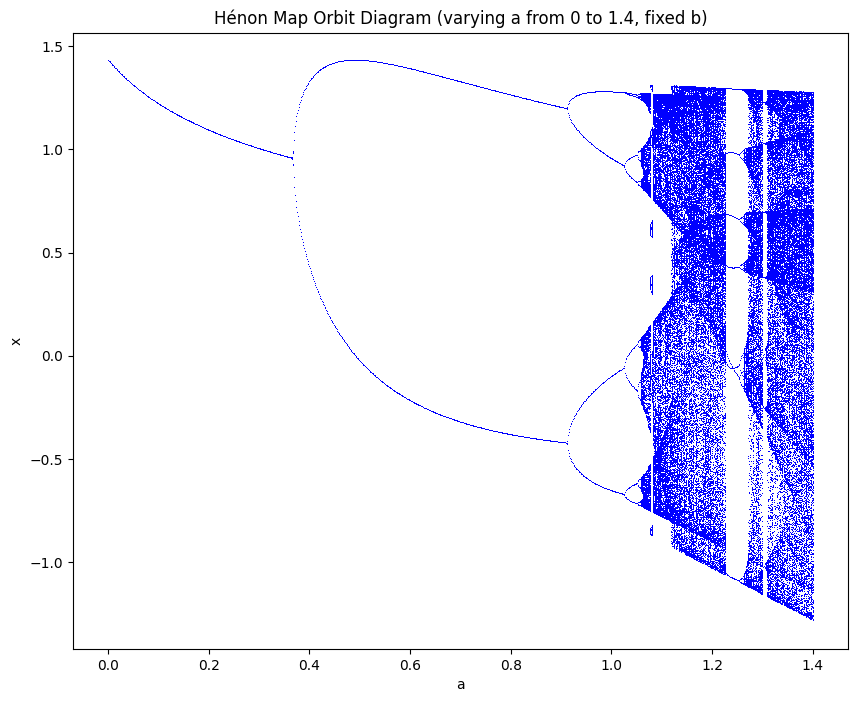

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# 使用 numpy 实现的 Hénon 映射函数
def henon_map(a, b, u0, N, threshold=1e10):
    x, y = u0
    trajectory = [(x, y)]
    for _ in range(N):
        x_new = 1 - a * x**2 + y
        y_new = b * x
        # 检查是否超出数值限制
        if abs(x_new) > threshold or abs(y_new) > threshold:
            break
        trajectory.append((x_new, y_new))
        x, y = x_new, y_new
    return np.array(trajectory)

# 绘制 Orbit Diagram 的函数
def plot_orbit_diagram(b, a_values, u0, N, last_points=100):
    """
    绘制 Hénon 映射的轨道图（Orbit Diagram）
    参数:
    b - 固定的系数值
    a_values - 需要探索的 a 值范围（numpy 数组，例如 np.linspace(0, 1.4, 100)）
    u0 - 初始值 (x0, y0)
    N - 每个 a 值的轨迹长度
    last_points - 用于绘图的最后几个轨迹点数
    """
    plt.figure(figsize=(10, 8))
    
    for a in a_values:
        # 计算当前 a 值的 Hénon 映射轨迹
        trajectory = henon_map(a, b, u0, N)
        
        if trajectory.shape[0] > last_points:  # 检查轨迹长度是否足够
            x_vals = trajectory[-last_points:, 0]  # 取最后 last_points 个 x 值
            plt.plot([a] * len(x_vals), x_vals, 'b,', markersize=1)

    plt.xlabel('a')
    plt.ylabel('x')
    plt.title('Hénon Map Orbit Diagram (varying a from 0 to 1.4, fixed b)')
    plt.show()

# 测试任务 3，绘制 Orbit Diagram
a_values = np.linspace(0, 1.4, 1000)  # a 从 0 到 1.4，100 个点
plot_orbit_diagram(b=0.3, a_values=a_values, u0=(0, 0), N=2000, last_points=500)


## 4.分析轨道图并找到 Hénon 映射可以收敛到周期性轨道的 a 值

观察到，a值在1.15-1.21期间有可以收敛到周期性轨道的特征

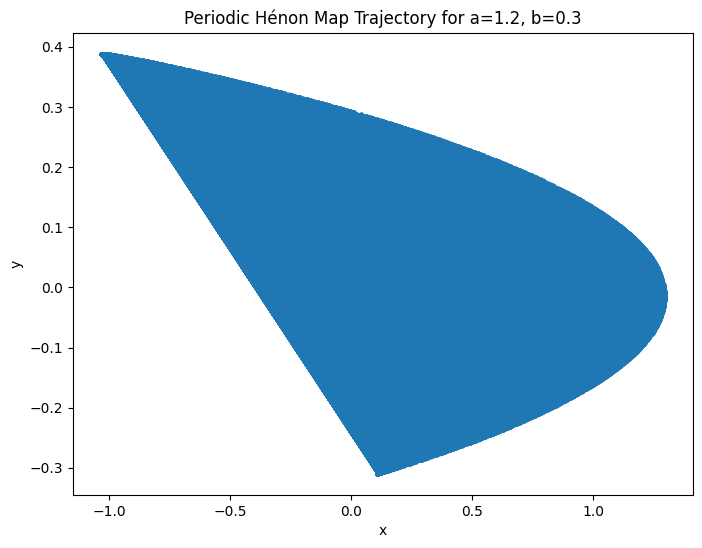

In [69]:
def find_periodic_trajectory(a, b, u0, N):
    """
    使用特定的 a 值生成并绘制 Hénon 映射的周期性轨迹
    参数:
    a - 使轨迹收敛到周期轨道的系数值
    b - 固定的系数值
    u0 - 初始值 (x0, y0)
    N - 轨迹长度
    """
    trajectory = henon_map(a, b, u0, N)
    x_vals, y_vals = trajectory[:, 0], trajectory[:, 1]
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', markersize=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Periodic Hénon Map Trajectory for a={a}, b={b}')
    plt.show()

# 测试任务 4，绘制周期性轨迹
find_periodic_trajectory(a=1.2, b=0.3, u0=(0, 0), N=10000)
